# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [330]:
# Prepare the Data
# Run the provided package dependency and data imports, and then merge the mouse_metadata and study_results DataFrames 
# into a single DataFrame.
# Display the number of unique mice IDs in the data, and then check for any mouse ID with duplicate time points. 
# Display the data associated with that mouse ID, and then create a new DataFrame where this data is removed. 
# Use this cleaned DataFrame for the remaining steps.
# Display the updated number of unique mice IDs.

In [331]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [332]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [333]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [334]:
# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")

In [335]:
# Display the data table for preview
# Re-arrange the columns
# df.loc[:,['Maths Score','Name','Sr.no']]
combined_data_df = combined_data_df.loc[:,["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
combined_data_df.head()
# combined_data_df.to_csv("joel_test.csv")

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [336]:
# Checking the number of mice.
combined_data_df["Mouse ID"].nunique()

249

In [337]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_timepoint = combined_data_df[["Mouse ID", "Timepoint"]].value_counts()

# To make the value counts as part of a dataframe I saved the output to a csv file
duplicated_timepoint.to_csv("duplicate.csv")

# Read the duplicate.csv file into a dataframe
duplicated_timepoint_df = pd.read_csv("duplicate.csv")

# Rename the third column "0" to Duplicates
duplicated_timepoint_df = duplicated_timepoint_df.rename(columns = {"0":"Duplicates"})

# Get the Mouse ID that have duplicate Timepoints
duplicated_timepoint_df.loc[duplicated_timepoint_df["Duplicates"] > 1]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [338]:
# Since we have now the Mouse ID with duplicated Timepoints. Let us now identify all row related to the Mouse ID
# Optional: Get all the data for the duplicate mouse ID. 
combined_data_df.loc[combined_data_df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [339]:
# To drop the rows with "g989", I have to set the index to Mouse ID
combined_data_df = combined_data_df.set_index("Mouse ID")

# Drop the rows with "g989"
clean_combined_data_df = combined_data_df.drop(index=('g989'))

# Reset the index to have the desired output
clean_combined_data_df = clean_combined_data_df.reset_index()

# Sample the output
clean_combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [340]:
# Checking the number of mice in the clean DataFrame.
clean_combined_data_df["Mouse ID"].nunique()

248

## Summary Statistics

In [341]:
# Generate Summary Statistics
# Create a DataFrame of summary statistics. Remember, there is more than one method to produce the results you're after, 
# so the method you use is less important than the result.

# Your summary statistics should include:
# A row for each drug regimen. These regimen names should be contained in the index column.
# A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.

In [342]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [343]:
clean_combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [344]:
# Get the dataframe for the mean of tumor volume
mean_tumor_volume_df = pd.DataFrame(clean_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())

# Rename "Tumor Volume (mm3)" to "Mean Tumor Volume"
mean_tumor_volume_df = mean_tumor_volume_df.rename(columns = {"Tumor Volume (mm3)":"Mean Tumor Volume"})
mean_tumor_volume_df

,Mean Tumor Volume
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [345]:
# Get the dataframe for the median of tumor volume
median_tumor_volume_df = pd.DataFrame(clean_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())

# Rename "Tumor Volume (mm3)" to "Median Tumor Volume"
median_tumor_volume_df = median_tumor_volume_df.rename(columns = {"Tumor Volume (mm3)":"Median Tumor Volume"})
median_tumor_volume_df

,Median Tumor Volume
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [346]:
# Get the dataframe for the variance of tumor volume
variance_tumor_volume_df = pd.DataFrame(clean_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())

# Rename "Tumor Volume (mm3)" to "Tumor Volume Variance"
variance_tumor_volume_df = variance_tumor_volume_df.rename(columns = {"Tumor Volume (mm3)":"Tumor Volume Variance"})
variance_tumor_volume_df

,Tumor Volume Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [347]:
# Get the dataframe for the standard deviation of tumor volume
std_tumor_volume_df = pd.DataFrame(clean_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())

# Rename "Tumor Volume (mm3)" to "Tumor Volume Std. Dev."
std_tumor_volume_df = std_tumor_volume_df.rename(columns = {"Tumor Volume (mm3)":"Tumor Volume Std. Dev."})
std_tumor_volume_df

,Tumor Volume Std. Dev.
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [348]:
# Get the dataframe for the SEM of tumor volume
sem_tumor_volume_df = pd.DataFrame(clean_combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

# Rename "Tumor Volume (mm3)" to "Tumor Volume Std. Err."
sem_tumor_volume_df = sem_tumor_volume_df.rename(columns = {"Tumor Volume (mm3)":"Tumor Volume Std. Err."})
sem_tumor_volume_df

,Tumor Volume Std. Err.
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [349]:
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_df = pd.concat([mean_tumor_volume_df, 
                             median_tumor_volume_df, 
                             variance_tumor_volume_df, 
                             std_tumor_volume_df, 
                             sem_tumor_volume_df], axis=1)
drug_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [360]:
# Create Bar Charts and Pie Charts
# Generate two bar charts. Both charts should be identical and show the total number of time points for all mice tested 
# for each drug regimen throughout the study.

# Create the first bar chart with the Pandas DataFrame.plot() method.
# Create the second bar chart with Matplotlib's pyplot methods.
# Generate two pie charts. Both charts should be identical and show the distribution of female versus male mice in the study.
# Create the first pie chart with the Pandas DataFrame.plot() method.
# Create the second pie chart with Matplotlib's pyplot methods.

In [361]:
# %matplotlib notebook

In [362]:
clean_combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [363]:
# Create the dataframe for the bar chart
bar_chart_df = pd.DataFrame(clean_combined_data_df.groupby("Drug Regimen")["Mouse ID"].count())
bar_chart_df = bar_chart_df.reset_index()
bar_chart_df = bar_chart_df.rename(columns={"Mouse ID":"Number of Mice Tested"})
bar_chart_df = bar_chart_df.sort_values("Number of Mice Tested", ascending=False)
bar_chart_df

,Drug Regimen,Number of Mice Tested
0,Capomulin,230
7,Ramicane,228
3,Ketapril,188
4,Naftisol,186
9,Zoniferol,182
5,Placebo,181
8,Stelasyn,181
1,Ceftamin,178
2,Infubinol,178
6,Propriva,148


In [ ]:
# Pandas can also plot multiple columns if the DataFrame includes them
# multi_plot = rain_df.plot(kind="bar", figsize=(20,5))
# PandasPlot.set_xticklabels() can be used to set the tick labels as well
# multi_plot.set_xticklabels(rain_df["State"], rotation=60)

# plt.show()
# plt.tight_layout()

<IPython.core.display.Javascript object>


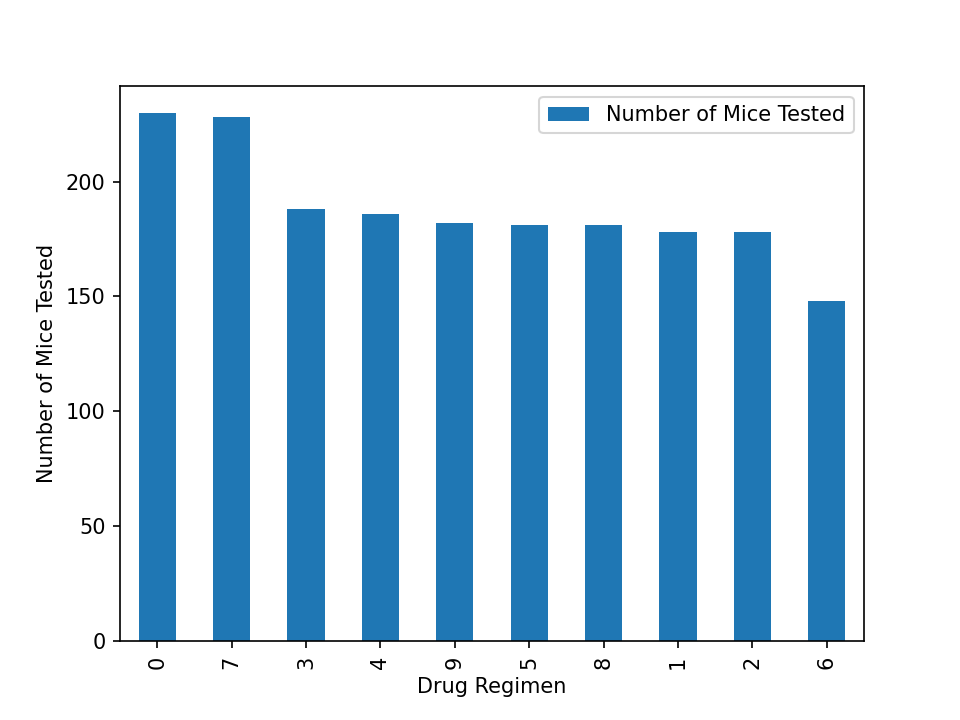

AttributeError: 'DataFrame' object has no attribute 'set_xticklabels'

In [376]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_chart_df.plot(kind="bar", xlabel="Drug Regimen", ylabel="Number of Mice Tested")
xticklabels = bar_chart_df.index
bar_chart_df.set_xticklabels(xticklabels, rotation=90)
plt.show

In [375]:
xticklabels

0    Capomulin
7     Ramicane
3     Ketapril
4     Naftisol
9    Zoniferol
5      Placebo
8     Stelasyn
1     Ceftamin
2    Infubinol
6     Propriva
Name: Drug Regimen, dtype: object

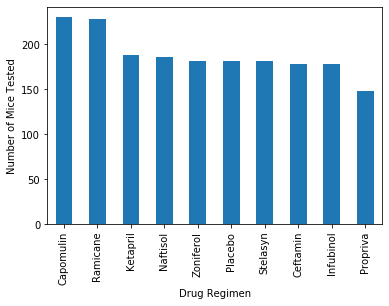

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

In [327]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen_list = bar_chart_df["Drug Regimen"]
number_of_mice_tested_list = bar_chart_df["Number of Mice Tested"]
#plt.xlabel("Drug Regimen")
#plt.ylabel("Number of Mice Tested")
#plt.bar(drug_regimen_list, number_of_mice_tested_list)
x_axis = np.arange(0, len(drug_regimen_list))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

#plt.xlim(-0.75, len(drug_regimen_list)-.25)
#plt.ylim(0, max(number_of_mice_tested_list) + 5)
#plt.xlim
#plt.bar(x_axis, number_of_mice_tested_list, facecolor="blue",alpha=1, align="center")
plt.xticks(tick_locations, drug_regimen_list, rotation="vertical")
plt.bar(drug_regimen_list, number_of_mice_tested_list)
# plt.xticks(tick_locations, drug_regimen_list, rotation="vertical")
# plt.show()

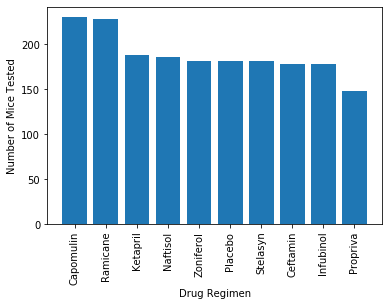

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

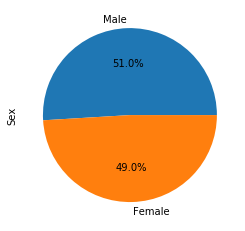

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



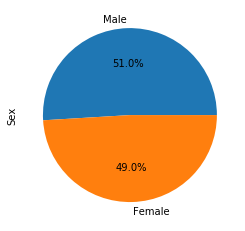

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


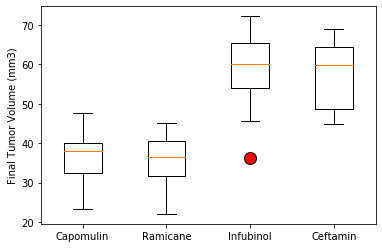

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

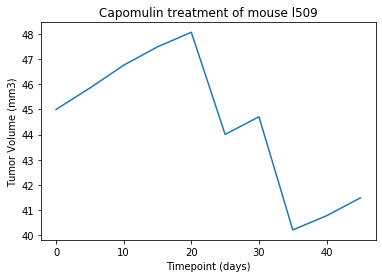

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



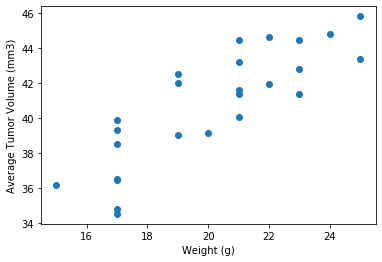

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


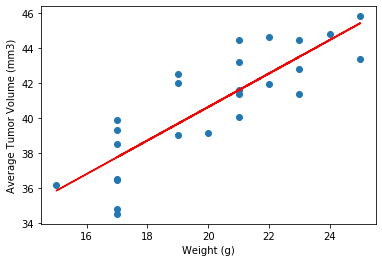

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

